# TP1 - Random number generators

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform,chi2,probplot

## 1. Generating uniform samples, QQ-plots, Kolmogorov-Smirnov test and chi ^2

### Generating Uniform Samples

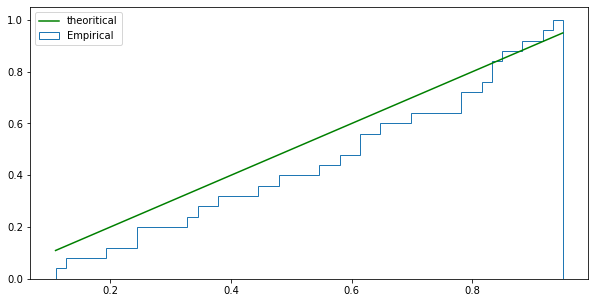

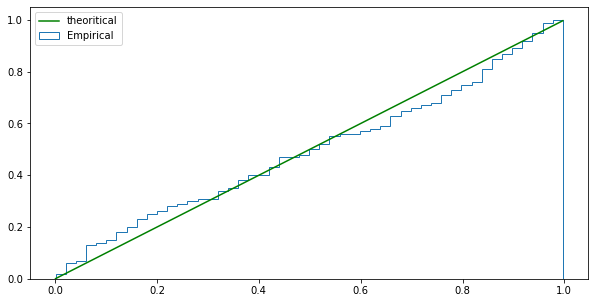

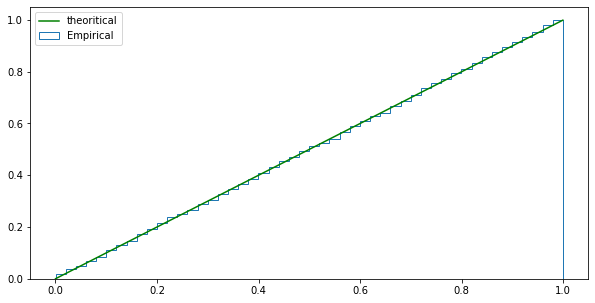

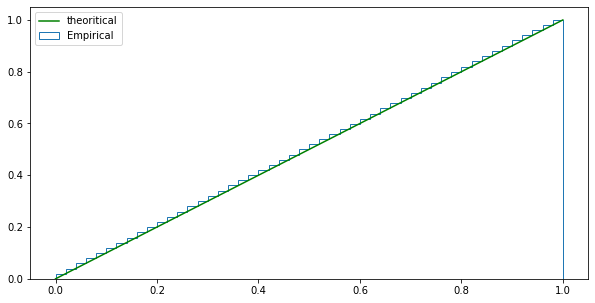

In [2]:
n = [25,100,int(1e3),int(1e5)]
cdf = uniform.cdf
for size in n:
    x = uniform.rvs(size=size)
    fig, ax = plt.subplots(1,figsize=(10,5))
    #ax.step(np.linspace(0,1,size),np.cumsum(x))
    ax.hist(x,50, density=True,histtype='step',cumulative=True, label='Empirical')
    ax.plot(np.sort(x),cdf(np.sort(x)),color='green',label='theoritical')
    plt.legend()
    plt.show()
"""
for size in n:
    plt.figure(figsize=(10,5))
    r = np.sort(uniform.rvs(size=size))
    cdf_r = cdf(r) -> computes the theorietical values, which does not work
    plt.step(r,cdf_r)
""";

### QQ-Plots

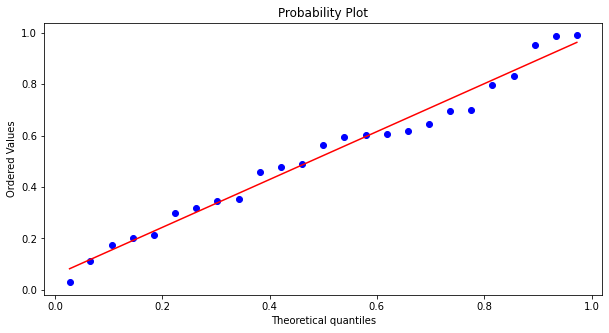

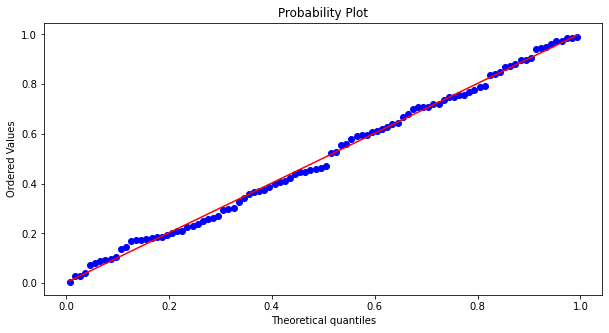

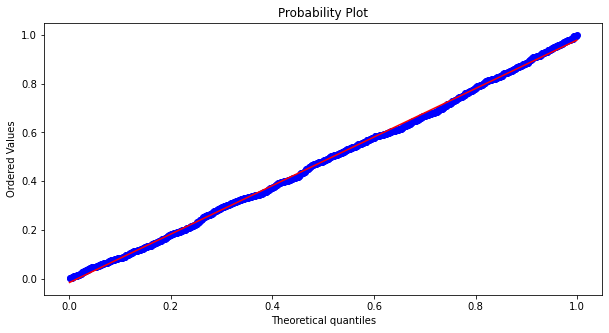

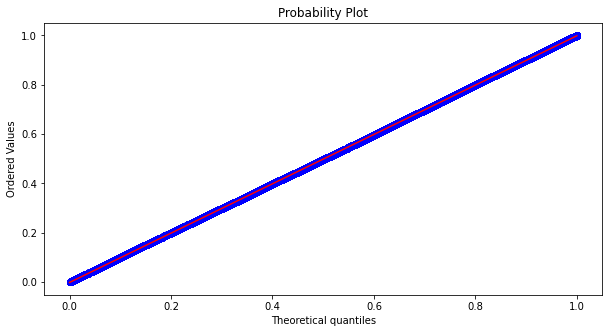

In [3]:
for size in n:
    fig,ax = plt.subplots(1,figsize=(10,5))
    probplot(uniform.rvs(size=size), dist="uniform",plot=plt)
    plt.show()

### Kolmogorov-Smirnov test

In [4]:
a = .1
n_kol = [5,10,20,40]
K_n_a = [1.14,1.17,1.16,1.20]
for idx,size in enumerate(n_kol):
    uni = uniform.rvs(size=size)
    r = np.sort(uni)
    ecdf = [(i+1)/size for i in range(size)]
    D_n = np.max(np.abs(ecdf-r))
    if np.sqrt(size)*D_n > K_n_a[idx]:
        print('reject')

### $\chi^2$ test

In [5]:
n = 100000
uni = uniform.rvs(size=n)
m = 100
K = m
increment = 1/(m+1)
indexes = np.ceil((uni*m)%m)
unique, counts = np.unique(indexes, return_counts=True)
N_j_dict = dict(zip(unique,counts))
N_j = np.array(list(N_j_dict.values()))
print(N_j)
test = np.array([np.sum((float(i)/K < uni) & (uni <= (i+1.)/K)) for i in range(K)])
#len(uni[(uni > 0.8) & (uni < 0.9)])
Q_m = np.sum((N_j-n*(1/m))**2/(n*(1/m)))
print(Q_m)
print(chi2.ppf(1-a,m-1))
if Q_m > chi2.ppf(a,m):
    print('reject H0')

[1057 1007 1002  995  973  973 1065 1080 1038 1017  999  936 1003 1012
 1029  979 1004  994 1004 1044  990 1052 1020  983  994  978  986 1035
  944 1018  994  958 1080 1009  982 1040  961  969  933  985  903  976
 1020 1005 1022  963 1031  950 1027 1031  961  995  915 1020 1008 1007
 1052  986  986 1066 1007  956 1008  964 1032 1000  938  993  977 1022
  991 1019 1006 1039  987  968 1027 1025 1024  985  999  977 1012 1011
 1010  981 1006  997  968  975  975 1013 1062  997 1027  978 1019  983
  943 1053]
115.264
117.4068831867789
reject H0


In [6]:
def ChiSquareTest(X, K = 10, alpha = 0.1):
    """
    Chi Squared Test for data X and significance alpha with K degrees of freedom
    """
    n = len(X)
    p = np.ones(K) / K
    print(p)
    N = np.array([np.sum((float(i)/K < X) & (X <= (i+1.)/K)) for i in range(K)])
    QK = np.sum( (N-n*p)**2. / (n*p)) # test statistic
    critval = chi2.ppf(1-alpha, K-1)
    true_chi = 1 * (QK > critval)
    rej = ['cannot be', 'is']
    stat = {'Statistic': QK, 'Quantile': critval, 'Significance': alpha}
    message = 'Chi2 test: the null hypothesis H0 ' + rej[true_chi] + ' rejected at level alpha = ' + str(alpha)
    return message, stat

In [7]:
ChiSquareTest(uni,m)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01]


('Chi2 test: the null hypothesis H0 cannot be rejected at level alpha = 0.1',
 {'Statistic': 115.264, 'Quantile': 117.4068831867789, 'Significance': 0.1})

## Linear Congruental Generator

$X_k = 3X_{k-1}$ mod m, $U_k = \frac{X_k}{m}$

In [8]:
m = 31
n = 10
init = 2
a = 3
b = 0
def LCG(init,a,b,n,m):
    res = np.zeros(n)
    res[0] = init
    for i in range(1,n):
        res[i] = (a*res[i-1]+b)%m
    return res/m

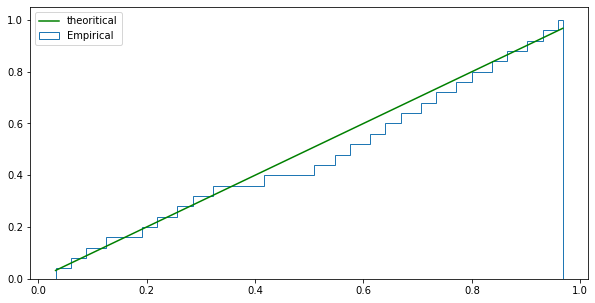

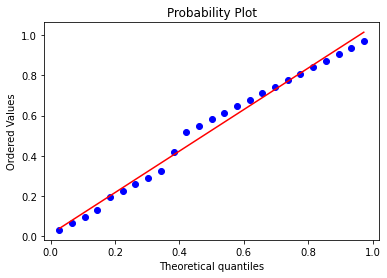

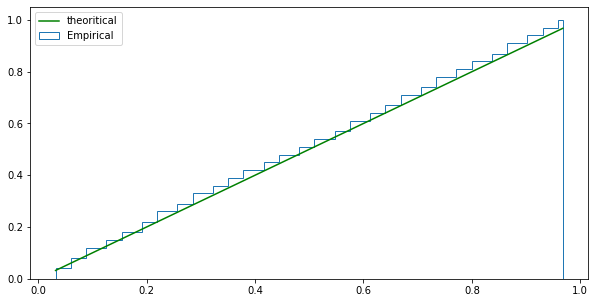

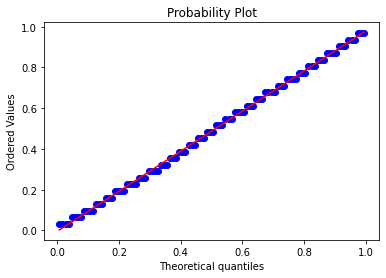

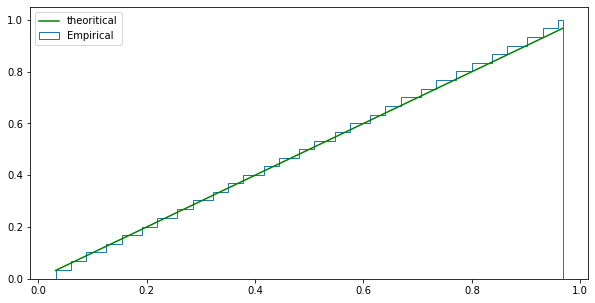

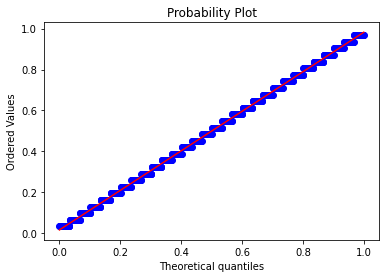

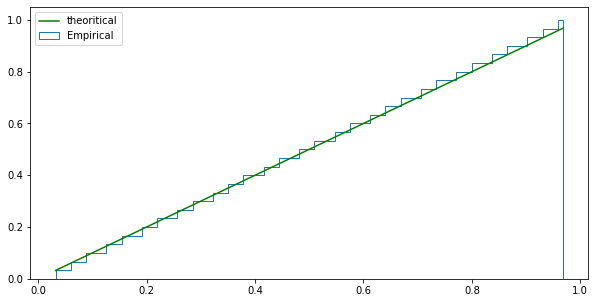

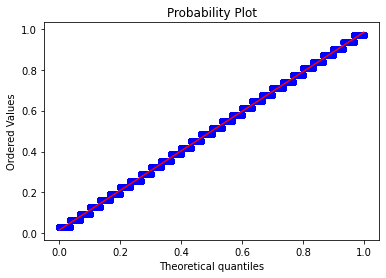

In [11]:
n = [25,100,int(1e3),int(1e5)]
cdf = uniform.cdf
for size in n:
    U = LCG(init,a,b,size,m)
    fig, ax = plt.subplots(1,figsize=(10,5))
    ax.hist(U,100, density=True,histtype='step',cumulative=True, label='Empirical')
    ax.plot(np.sort(U),cdf(np.sort(U)),color='green',label='theoritical')
    plt.legend()
    plt.show()
    probplot(U, dist="uniform",plot=plt)
    

In [16]:
a = .1
n_kol = [5,10,20,40,1000,10000,100000]
K_n_a = [1.14,1.17,1.16,1.20,1.22,1.22,1.22]
for idx,size in enumerate(n_kol):
    uni = LCG(init,3,0,size,31)
    r = np.sort(uni)
    ecdf = [(i+1)/size for i in range(size)]
    D_n = np.max(np.abs(ecdf-r))
    if np.sqrt(size)*D_n > K_n_a[idx]:
        print(size,'reject')
    else:
        print(size,'no rejection of H0')

5 no rejection of H0
10 no rejection of H0
20 no rejection of H0
40 no rejection of H0
1000 no rejection of H0
10000 reject
100000 reject
